# [파이썬 머신러닝 완벽 가이드] <br>
# 07 군집화

## 07-1 K-평균 알고리즘 이해 <br>
- K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘임
- K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법임
<br><br>
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행함
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법임<br>
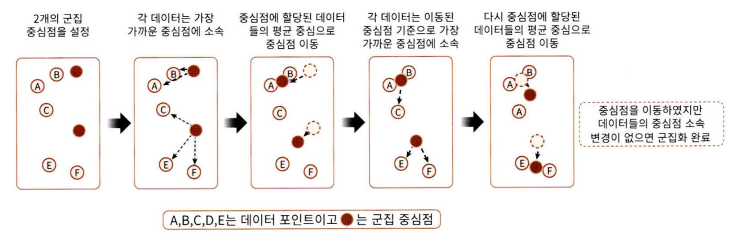
<br>
- **K-평균의 장점**
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결함
- **K-평균의 단점**
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
    - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

### [사이킷런 KMeans 클래스 소개]
- 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공함 

```python
class sklearn.cluster.KMeans(n_clusters=8, init='k-menas++', n_init=10, max_iter=300, tol=0.0001, 
                             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, 
                             n_jobs=1, algorithm='auto)
```
   - KMeans 초기화 파라미터 중 가장 중요한 파라미터는 `n_clusters`이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미함
   - `init`은 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함
   - `max_iter`는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함
<br><br>
  
- KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 `fit(데이터 세트)` 또는 `fit_transform(데이터세트)` 메소드를 이용해 수행하면 됨
- 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수가 있음
    - `lables_`: 각 데이터 포인트가 속한 군집 중심점 레이블
    - `cluster_centers_`: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수])이므로 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음

### [K-평균을 이용한 붓꽃 데이터 세트 군집화]

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
#irisDF의 각 데이터가 어떤 중심에 속하는지 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [6]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


- Target 0 값 데이터는 1번 군집으로 모두 다 잘 grouping됨
- Target 1 값 데이터는 2개만 0번 군집으로 grouping되었고 나머지 48개는 모두 2번 군집으로 grouping됨
- Target 2 값 데이터는 0번 군집에 36개, 2번 군집에 14개로 분산되어 grouping됨

In [12]:
from sklearn.decomposition import PCA

#데이터의 속성이 4개이므로 PCA를 이용해 4개의 속성을 2개로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0           5.1          3.5           1.4          0.2       0        1   
1           4.9          3.0           1.4          0.2       0        1   
2           4.7          3.2           1.3          0.2       0        1   

      pca_x     pca_y  
0 -2.684126  0.319397  
1 -2.714142 -0.177001  
2 -2.888991 -0.144949

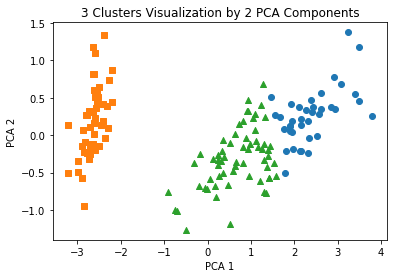

In [13]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- Cluster 1을 나타내는 네모('s')는 명확히 다른 군집과 잘 분리되어 있음
- Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당 수준 분리되어 있지만 네모만큼 명확하게 분리되어 있지 않음

### [군집화 알고리즘 테스트를 위한 데이터 생성]
- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공함
- 대표적인 군집화용 데이터 생성기: `make_blobs()`, `make_classification()` API  
- `make_blobs()`는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음
- `make_classification()`은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음
- 이 외에 `make_circle()`, `make_moon()` API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용됨
<br><br>
- `make_blobs()` API 호출 파라미터
    - `n_samples`: 생성할 총 데이터 개수로 default는 100개임
    - `n_features`: 데이터의 피처 개수로 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현함
    - `centers`: int 값으로 예를 들어 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미함
    - `cluster_std`: 생성될 군집 데이터의 표준 편차를 의미함. 만일 float값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8,1.2,0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듦. 군집별로 서로 다른 표준 편차를 가진 데이터를 만들 때 사용함

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [19]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0

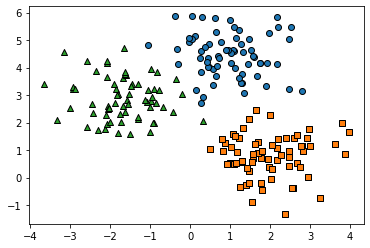

In [22]:
target_list = np.unique(y)

#각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']

#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target=0, target=1, target=2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

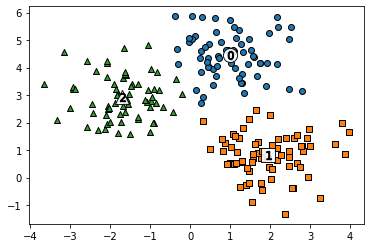

In [25]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

#군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

#make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음 (산점도의 마커가 서로 다를 수 있음)

In [26]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


- 대부분 잘 매핑되었음
<br><br>
- `make_blobs()`는 cluster_std 파라미터로 데이터의 분포도를 조절함
- cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음<br>
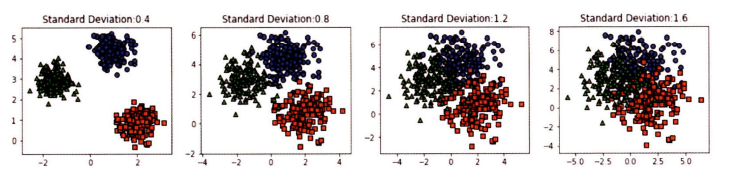

## 07-2 군집 평가 (Cluster Evaluation) <br>

### [실루엣 분석의 개요]
- 군집화 평가 방법으로 실루엣 분석 (silhouette analysis)이 있음
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄
- 효율적으로 잘 분리되었다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미임
<br><br>
- 실루엣 분석은 `실루엣 계수 (silhouette coefficient)`를 기반으로 함
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표로 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표임 <br>  
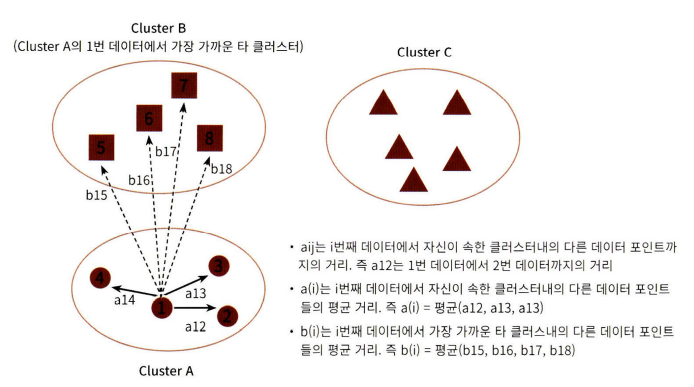 <br>
- i번째 데이터 포인트의 실루엣 계수 값 
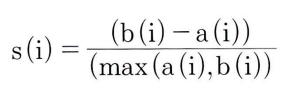 <br>
- 실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임
- (-) 값은 아예 다른 군집에 데이터 포인트가 할당되었음을 뜻함
<br><br>
- 사이킷런은 이러한 실루엣 분석을 위해 다음과 같은 메소드를 제공함
    - `sklearn.metrics.silhouette_samples(X, labels, metric=’euclidean’, **kwds)`: 인자로 X feature 데이터 셋과 각 피처 데이터 셋이 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환함
    - `sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, smaple_szie = None, **kwds)`: 인자로 X feature 데이터 셋과 각 피처 데이터 셋이 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환함. 즉 `np.mead(silhouette_samples())`이며, 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있지만 무조건 이 값이 높다고 해서 군집화가 잘 되었다고 판단할 수는 없음
<br><br>
- 좋은 군집화가 되려면 다음 기준 조건을 만족해야 함
    - 전체 실루엣 계수의 평균값. 즉 사이킷런의 `silhouette_score()` 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
    - 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집ㄷ르의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님

### [붓꽃 데이터 세트를 이용한 군집 평가]

In [28]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


sepal_length  sepal_width  petal_length  petal_width  cluster  \
0           5.1          3.5           1.4          0.2        1   
1           4.9          3.0           1.4          0.2        1   
2           4.7          3.2           1.3          0.2        1   

   silhouette_coeff  
0          0.852955  
1          0.815495  
2          0.829315

In [30]:
#군집(cluster)별 평균 실루엣 계수 값 출력
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

### [군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법] <br>
#### 군집의 개수: 2 <br>
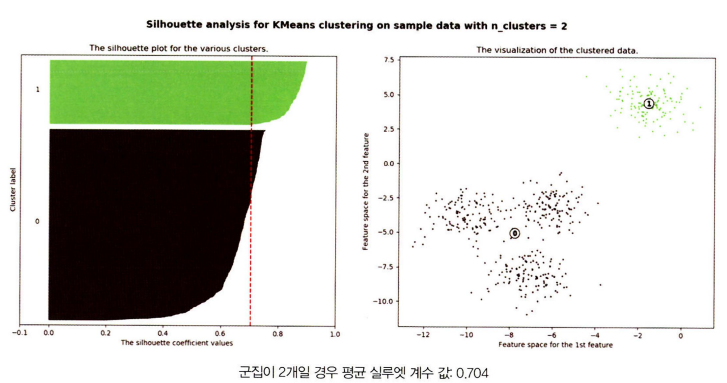 <br>
#### 군집의 개수: 3 <br>
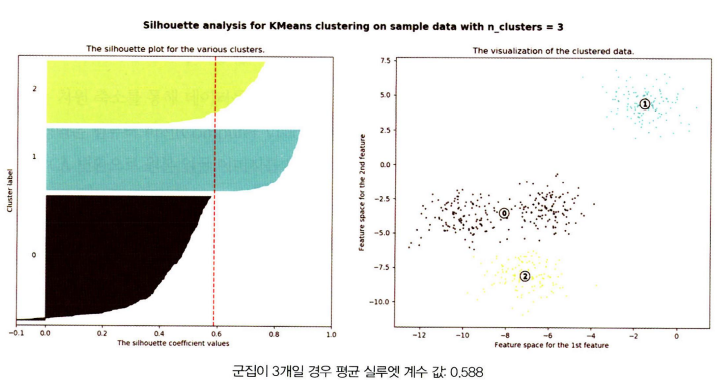 <br>
#### 군집의 개수: 4 <br>
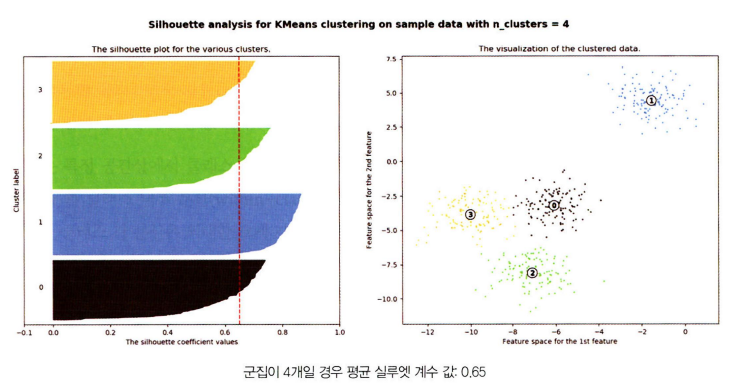 <br>
- 군집이 4개인 경우에 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치함
- 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있음

In [33]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

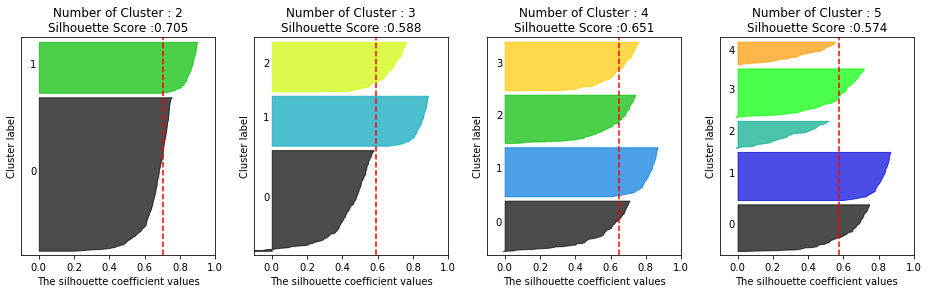

In [35]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

#4개의 군집일 때 가장 최적이 됨

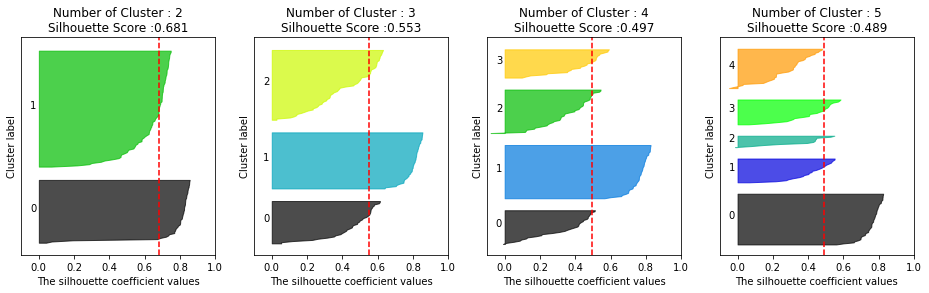

In [37]:
from sklearn.datasets import load_iris 
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

#군집 개수를 2개로 하는 것이 좋아 보임

## 07-3 평균 이동 <br>

### [평균 이동(Mean Shift)의 개요]
- 평균 이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행함
- 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
<br><br>
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾으며 이를 위해 `확률 밀도 함수 (probability density function)`을 사용함
- 가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 `KDE (Kernel Density Estimation)`을 이용함
<br>
  
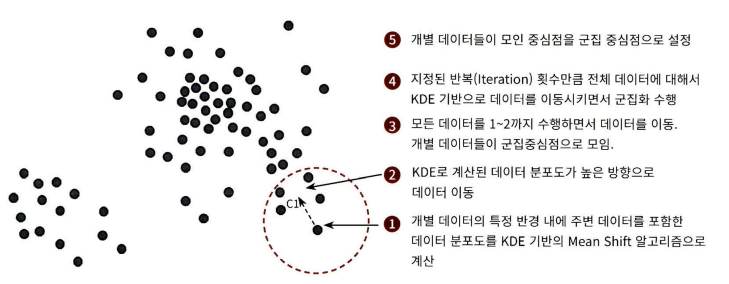 <br>
- `KDE (Kernel Density Estimation)`은 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법임
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정함
- 대표적인 커널 함수로서 `가우시안 분포 함수`가 사용됨
<br>
  
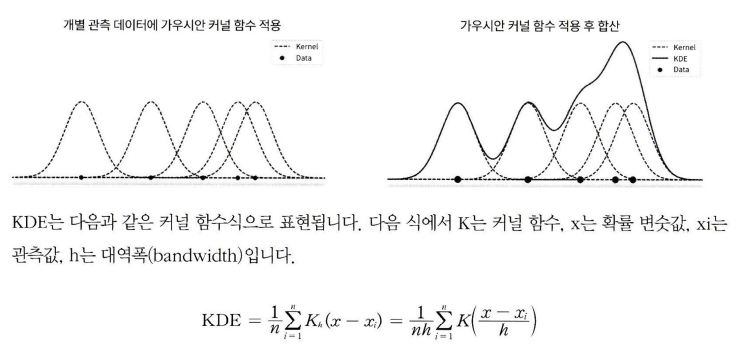 <br>
- 대역폭 h는 KDE 형태를 부드러운 (또는 뾰족한) 형태로 평활화 (Smooting)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있음 
- 작은 h 값 (h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합 (over-fitting)하기 쉬움
- 반대로 매우 큰 h 값 (h=10)은 과도하게 평활화 (smooting)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합 (under-fitting)하기 쉬움 
- 적절한 KDE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 (Mean Shift) 군집화에서 매우 중요함<br>
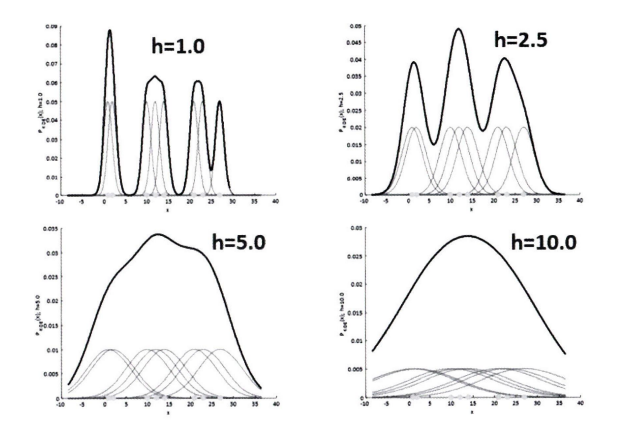 <br>
- 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐
- 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행함

In [38]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 6개로 지나치게 세분화되어 군집화됨
- 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐

In [39]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 잘 군집화됨
- 데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있음
- 따라서, MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요함

In [41]:
from sklearn.cluster import estimate_bandwidth

#최적화된 bandwidth값 반환
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [42]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


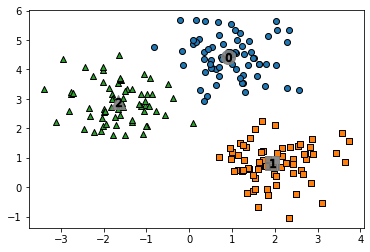

In [43]:
import matplotlib.pyplot as plt

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [45]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- Target 값과 군집 label 값이 1:1로 잘 매칭됨
  <br><br>
- 평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다는 것임
- 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없음
- 하지만 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 큼

## 07-4 GMM (Gaussian Mixture Model) <br>

### [GMM (Gaussian Mixture Model) 소개]
- GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포 (Gaussian Distribution)을 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식임
- 정규 분포 (Normal Distribution)이라고도 알려진 가우시안 분포는 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수임
<br>
  
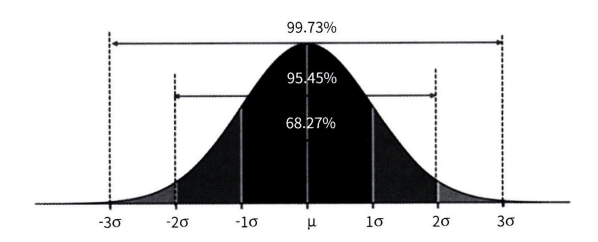 <br>
- GMM (Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주함 <br>
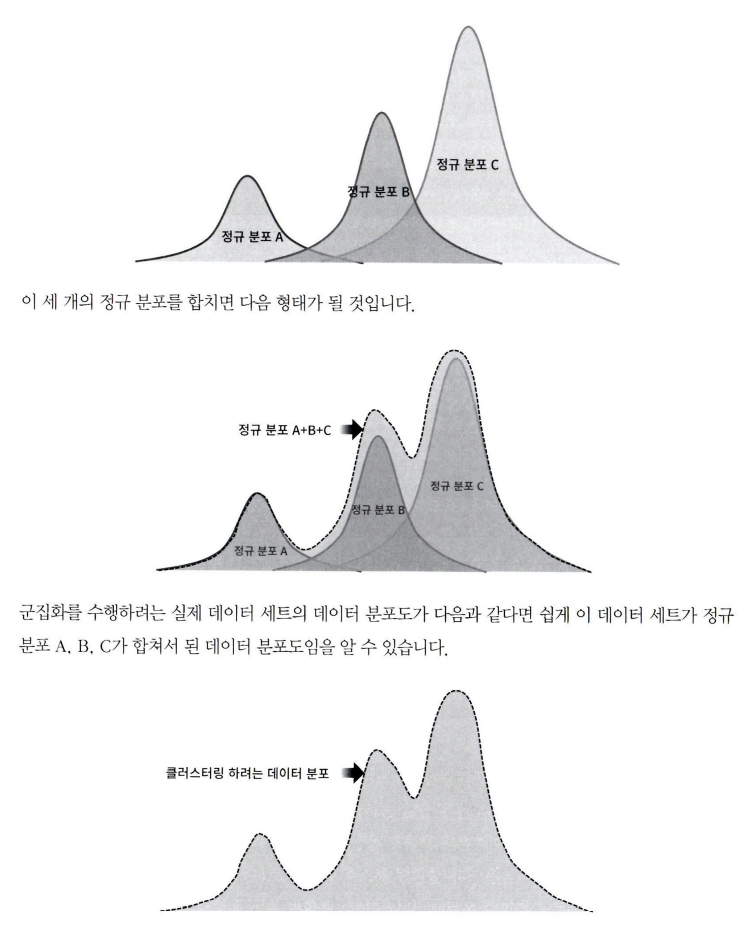 <br>
- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식임
- 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식임 <br>
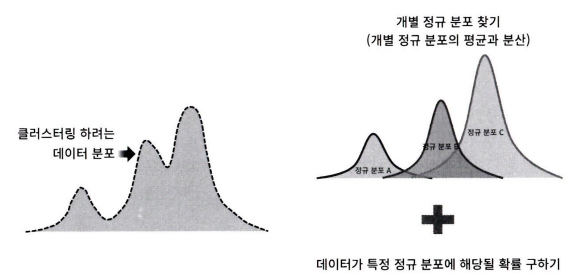 <br>
- 이와 같은 방식은 GMM에서 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것임
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 이러한 모수 추정을 위해 GMM은 `EM (Expection and Maximization)` 방법을 적용함

### [GMM을 이용한 붓꽃 데이터 세트 군집화]

In [46]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

#좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- GaussianMixture 객체의 가장 중요한 초기화 파라미터는 gaussian mixture의 모델의 총 개수를 나타내는 `n_components`임
- K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할을 수행함

In [47]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [48]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


- 붓꽃 데이터 세트가 GMM 군집화에 더 효과적임

### [GMM과 K-평균의 비교]
- K-평균은 원형의 범위에서 군집화를 수행하므로 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율이 높아짐 <br>
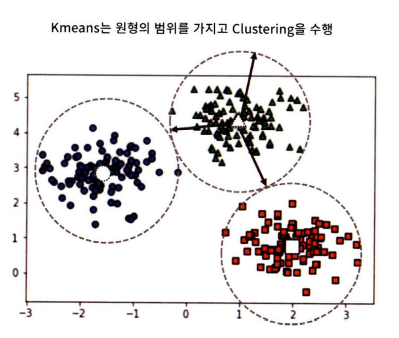 <br>
- 군집 시각화 함수: `visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=Ture)`
    - `clusterobj`: 사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력
    - `dataframe`: 피처 데이터 세트와 label 값을 가진 DataFrame
    - `label_name`: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명. make_blobs() 결과 시각화일 경우는 dataframe 내의 target 칼럼 명
    - `iscenter`: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [49]:
#클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

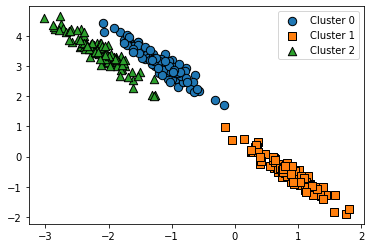

In [50]:
from sklearn.datasets import make_blobs

#make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

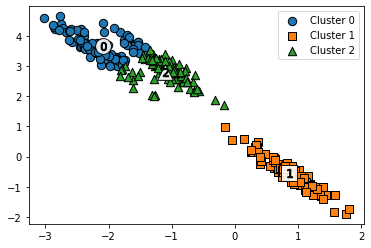

In [51]:
#3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

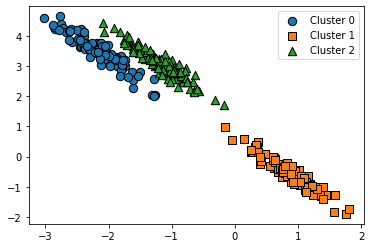

In [52]:
#3개의 n_componenets 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화됨
- GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않음

In [53]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있음
- 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있음

## 07-5 DBSCAN <br>

### [DBSCAN 개요]
- DBSCAN (Density Based Spatial Clustering of Applications with Noise)는 간단하고 직관적인 알고리즘으로 되어 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함
- 아래와 같은 복잡한 기하학적 분포도를 가진 데이터 세트는 K 평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기가 어렵지만, DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 군집화를 잘 수행함 <br>
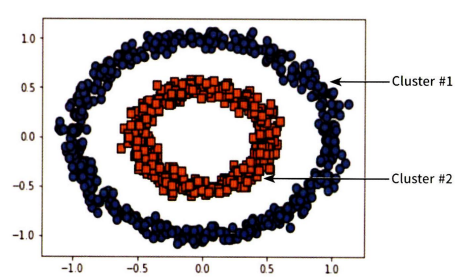 <br>
- DBSCAN을 구성하는 가장 중요한 두 가지 파라미터
    - `입실론 주변 영역 (epsilon)`: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
    - `최소 데이터 개수 (min points)`: 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
<br><br>
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함
    - `핵심 포인트 (Core Point)`: 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터
    - `이웃 포인트 (Neighbor Point)`: 주변 영역 내에 위치한 타 데이터
    - `경계 포인트 (Border Point)`: 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
    - `잡음 포인트 (Noise Point)`: 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터
<br><br>
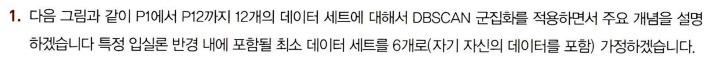
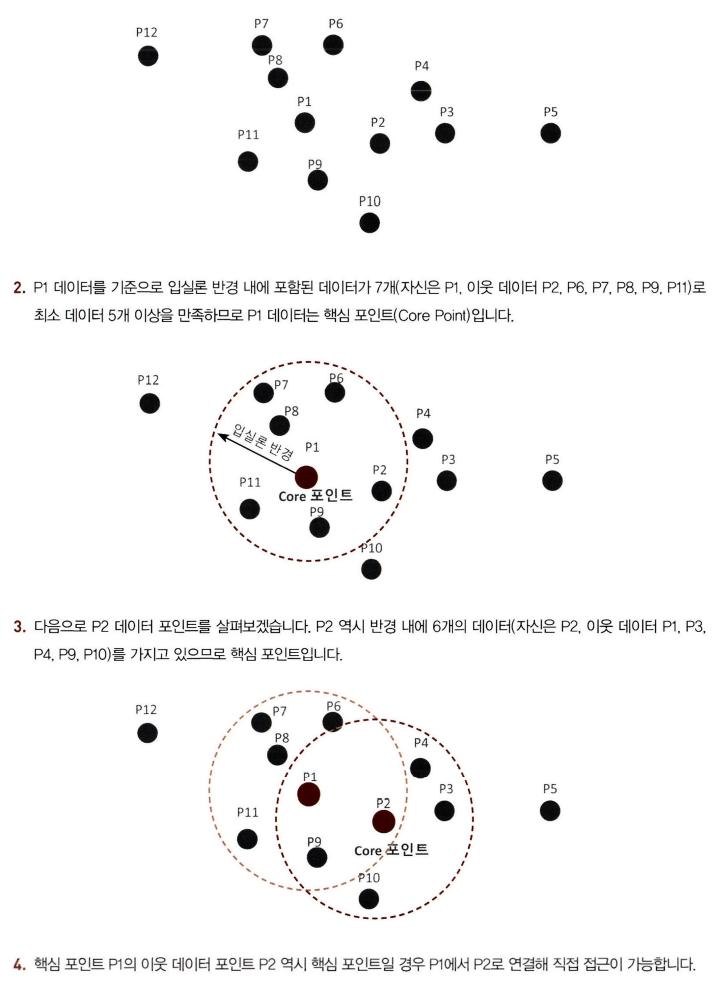
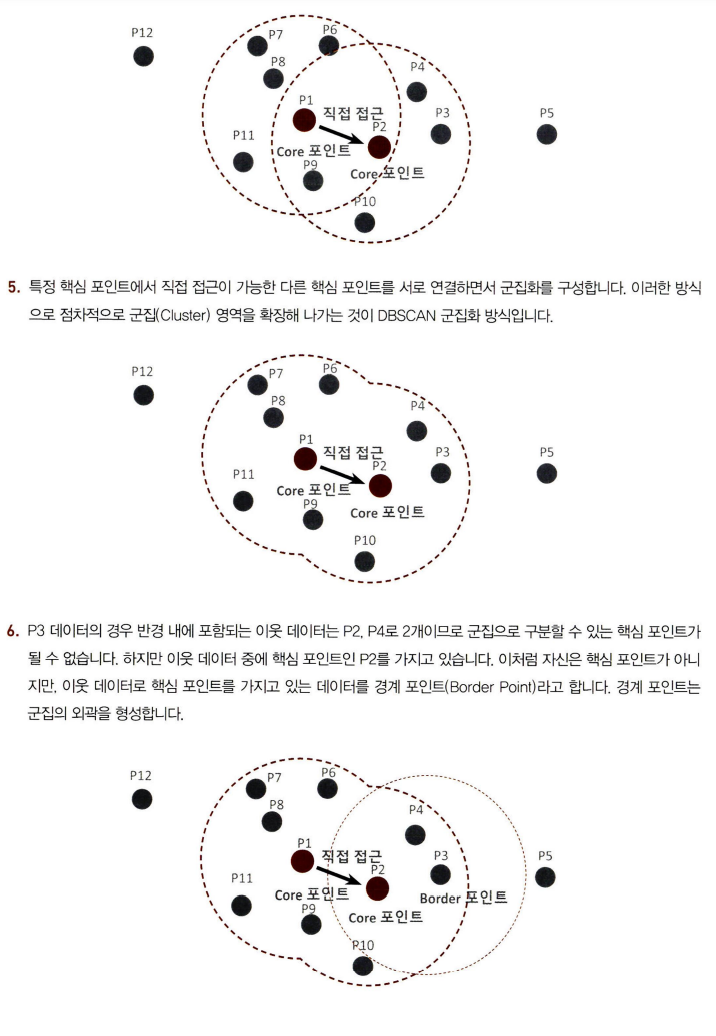
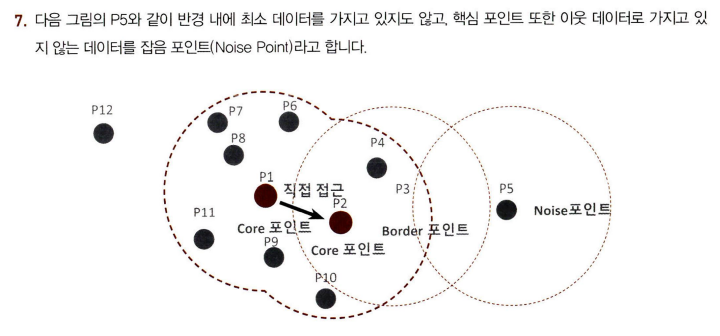 <br>
- DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식임
- 사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원함
- DBSCAN 클래스의 주요 초기화 파라미터
    - `eps`: 입실론 주변 영역의 반경을 의미함
    - `min_samples`: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수를 의미함 (자신의 데이터를 포함함. 위에서 설명한 min points + 1)

### [DBSCAN 적용하기 - 붓꽃 데이터 세트]

In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') #일반적으로 eps 값으로는 1 이하의 값을 설정함
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 군집 레이블이 -1인 것은 노이즈에 속하는 군집임
- 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화되었음
- Target 값의 유형이 3가지인데, 군집이 2개가 되었다고해서 군집화 효율이 떨어진다는 의미는 아님

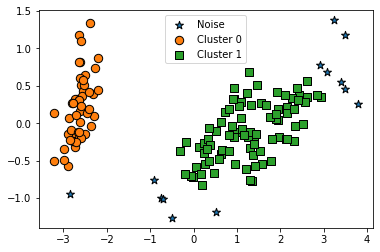

In [58]:
from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 별표로 표현된 값은 모두 노이즈임
- 일반적으로 eps 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
- min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커짐
- 데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문임

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


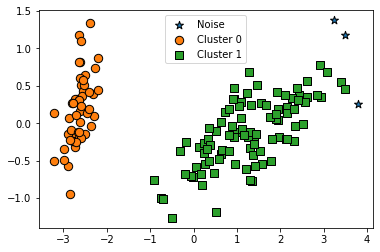

In [67]:
#eps 증가 - 노이즈 데이터가 3개로 감소

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


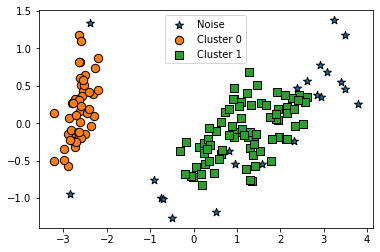

In [68]:
#min_samples 증가 - 노이즈 데이터가 기존보다 많이 증가

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### [DBSCAN 적용하기 - make_circles() 데이터 세트]

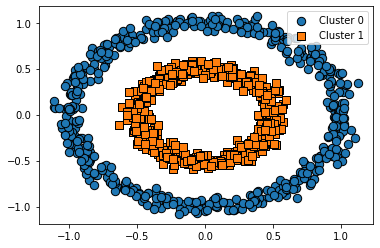

In [69]:
from sklearn.datasets import make_circles

#make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없음
#noise: 노이즈 데이터 세트의 비율, factor: 외부 원과 내부 원의 scale 비율
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

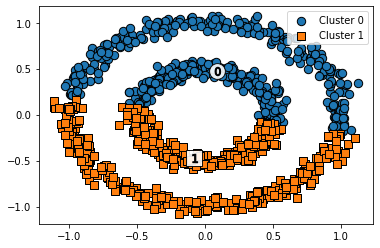

In [71]:
#KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

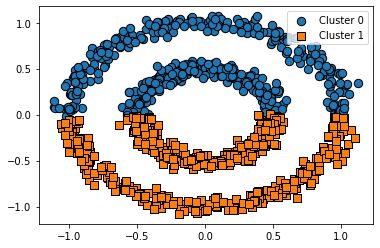

In [74]:
#GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

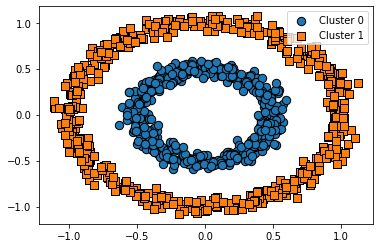

In [75]:
#DBSCAN으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)